In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns = ['signal','density']

<AxesSubplot:xlabel='signal', ylabel='density'>

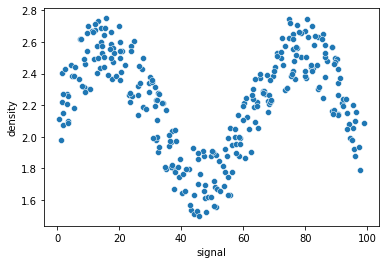

In [5]:
sns.scatterplot(x='signal',y='density',data=df)

In [11]:
X = df['signal'].values.reshape(-1,1)  #This is needed for single feature(check why)
y = df['density']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [13]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [14]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [16]:
lr_pred = lr_model.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [18]:
mean_absolute_error(y_test,lr_pred)

0.211198973318633

This error value is actually decent but there is an underlying issue .

In [20]:
signal_range = np.arange(0,100)

In [21]:
signal_preds = lr_model.predict(signal_range.reshape(-1,1))

In [22]:
signal_preds

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

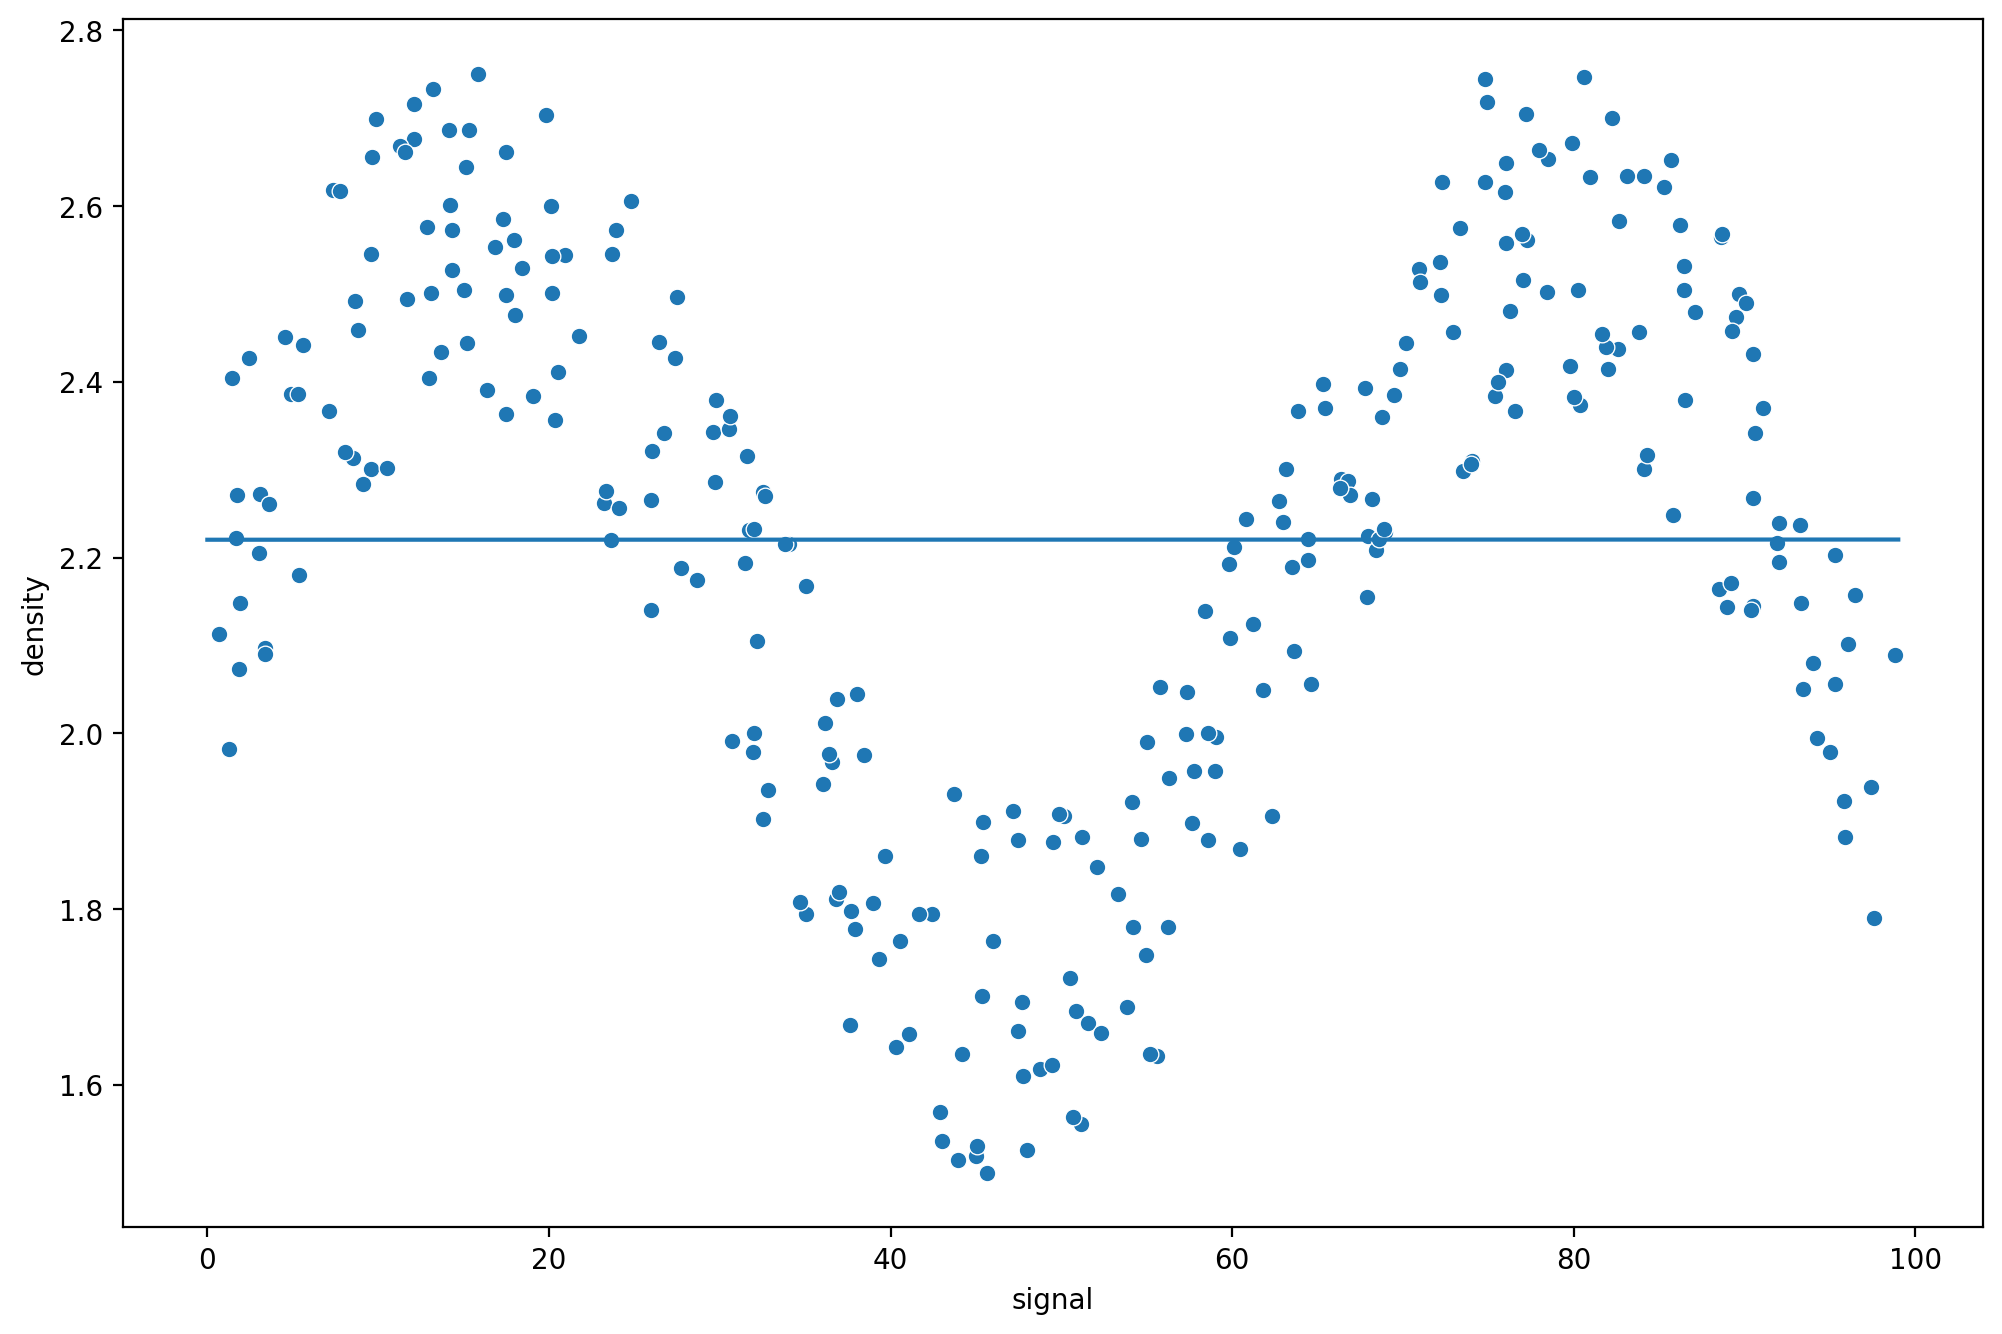

In [25]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='signal',y='density',data=df)

plt.plot(signal_range,signal_preds)

It is observed that while the performance metrics were decent, the linear regression model has totally failed in coming up with a reasonable approximate for the given data points

Function to train ,predict, obtain performance metrics and obtain the plot 

In [29]:
def run_model(model,X_train,y_train,X_test,y_test):
    #Fit model training
    model.fit(X_train,y_train)

    #Get metrics
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test,preds)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')

    #Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))

    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(x='signal',y='density',data=df)

    plt.plot(signal_range,output)

MAE: 0.211198973318633
RMSE: 0.2570051996584629


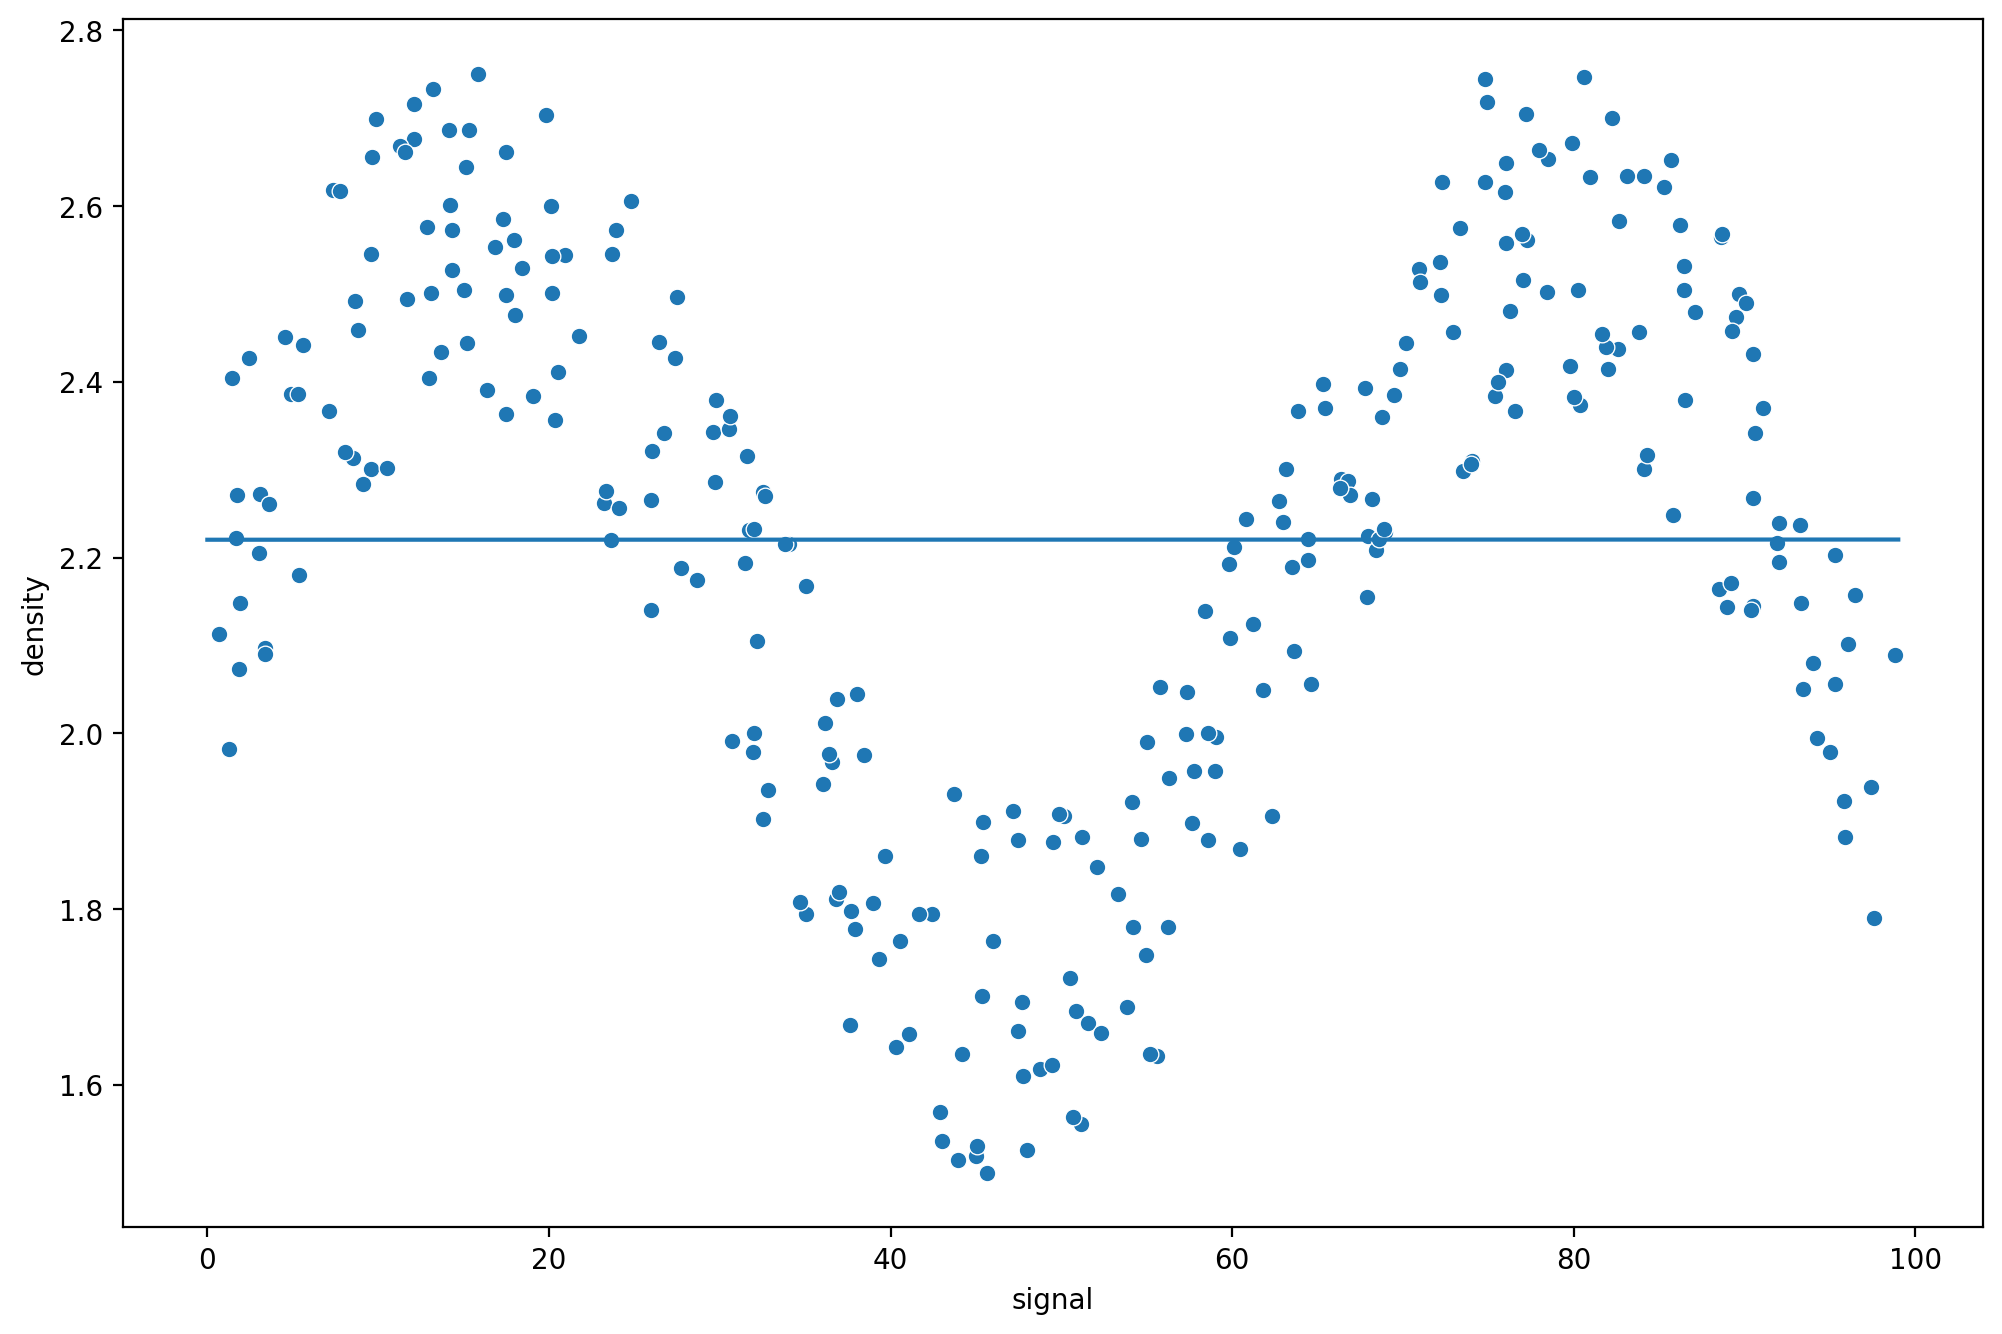

In [31]:
model = LinearRegression()

run_model(model,X_train,y_train,X_test,y_test)

difference between pipeline and make_pipeline

* In Pipeline() we specify the name for each operator explicitly whereas in make_pipeline it is generated automatically

* We would like to know the names of the steps in cases where we intend to tune model parameters for example when we are specifying the param_grid in GridsearchCV

In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [39]:
pipe = make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

MAE: 0.11969168045531671
RMSE: 0.1380752007754405


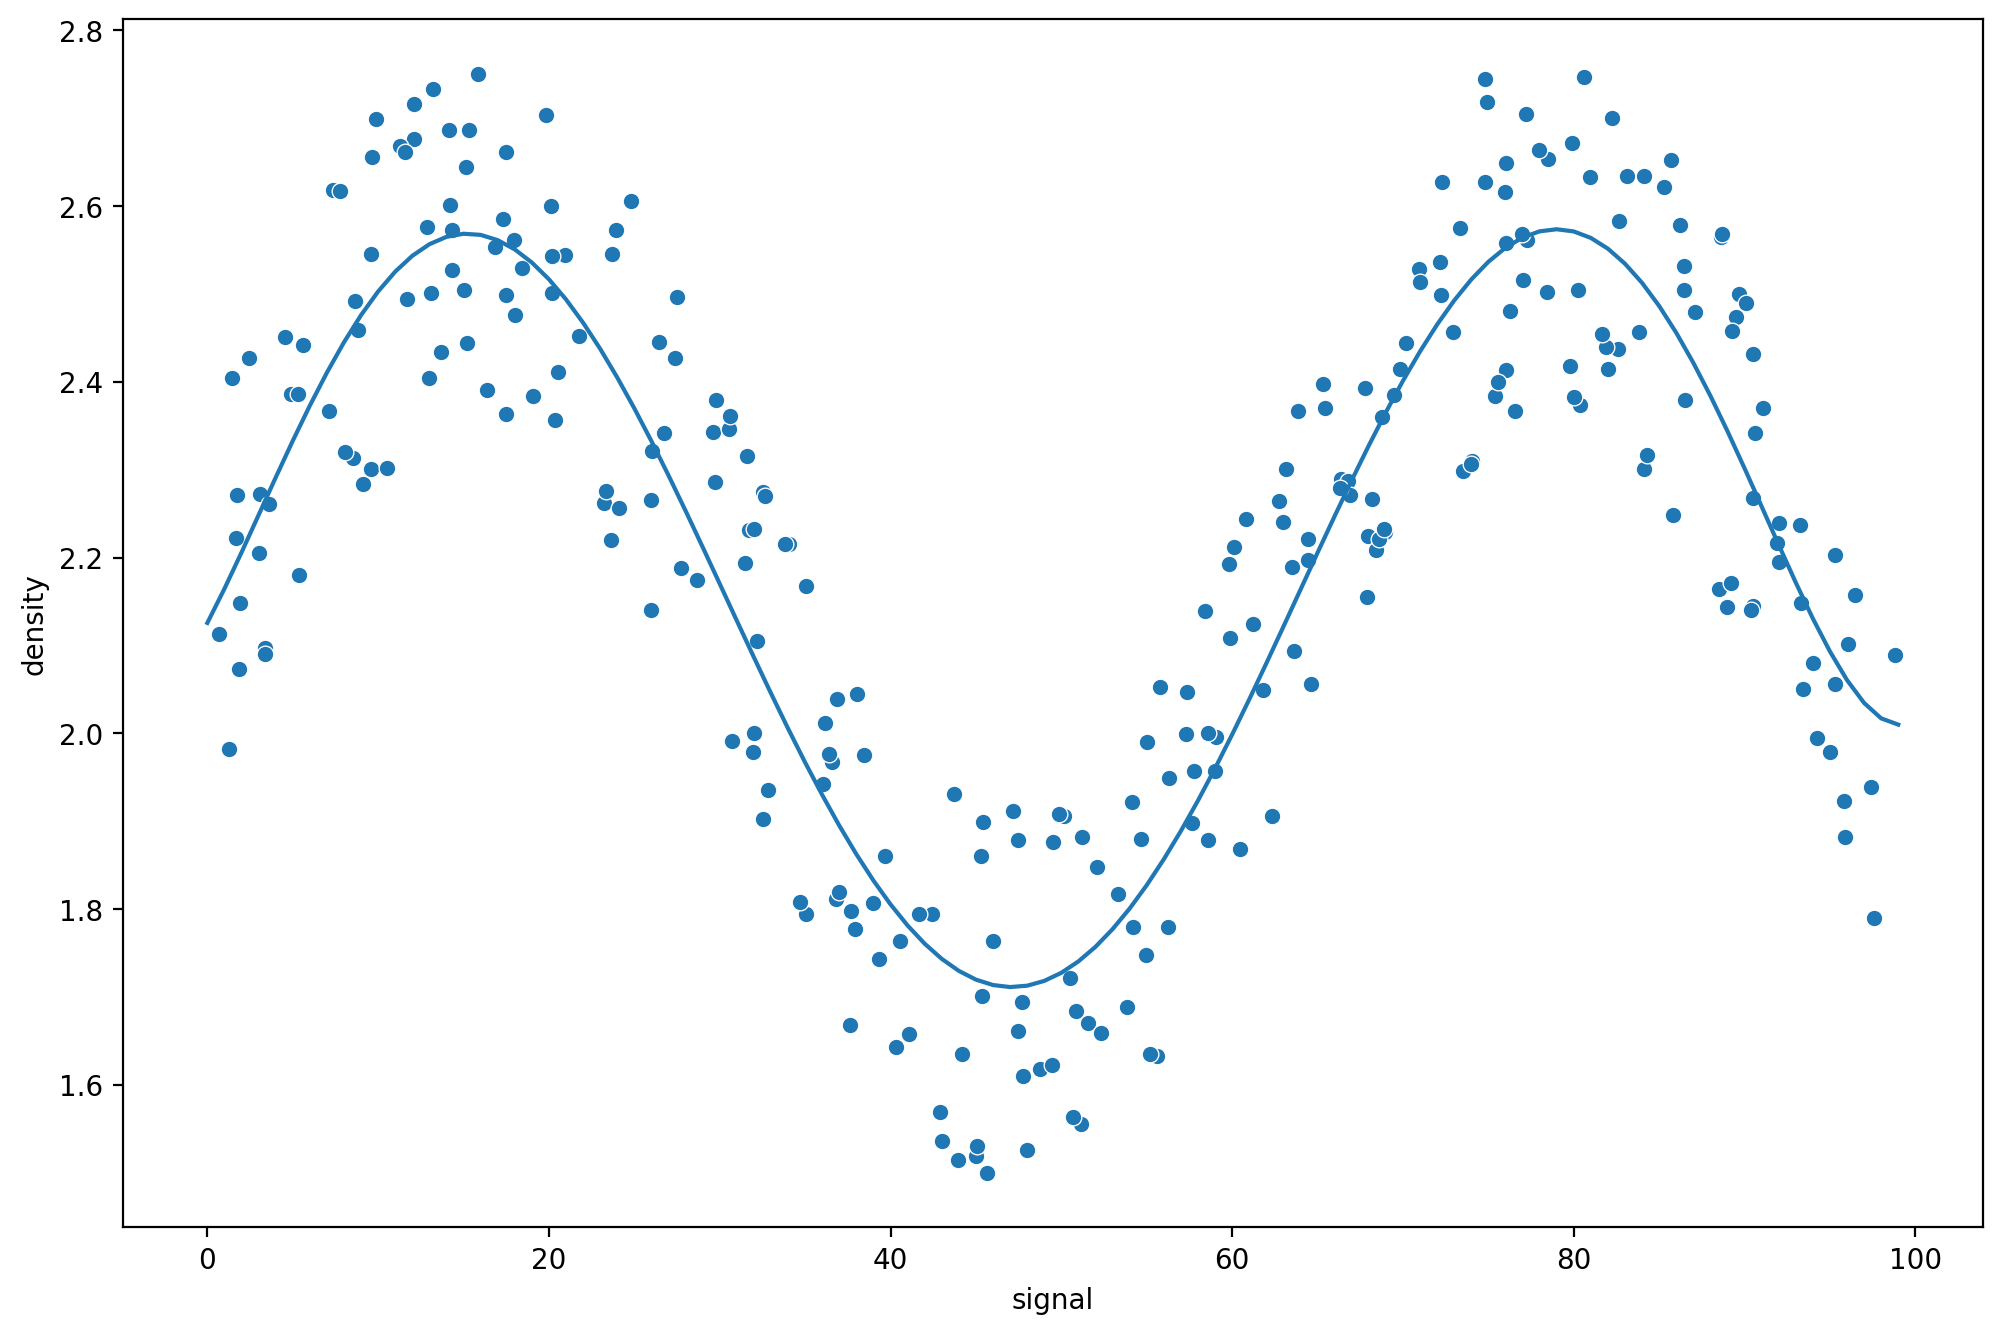

In [40]:
run_model(pipe,X_train,y_train,X_test,y_test)

Using more robust regression techniques

K nearest neighbours regressor

In [46]:
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337
MAE: 0.12198383614100558
RMSE: 0.13730685016923647
MAE: 0.11635971693292672
RMSE: 0.13277855732740926
MAE: 0.1207030971917154
RMSE: 0.1397499127378895
MAE: 0.13363165935705318
RMSE: 0.15954234753677107


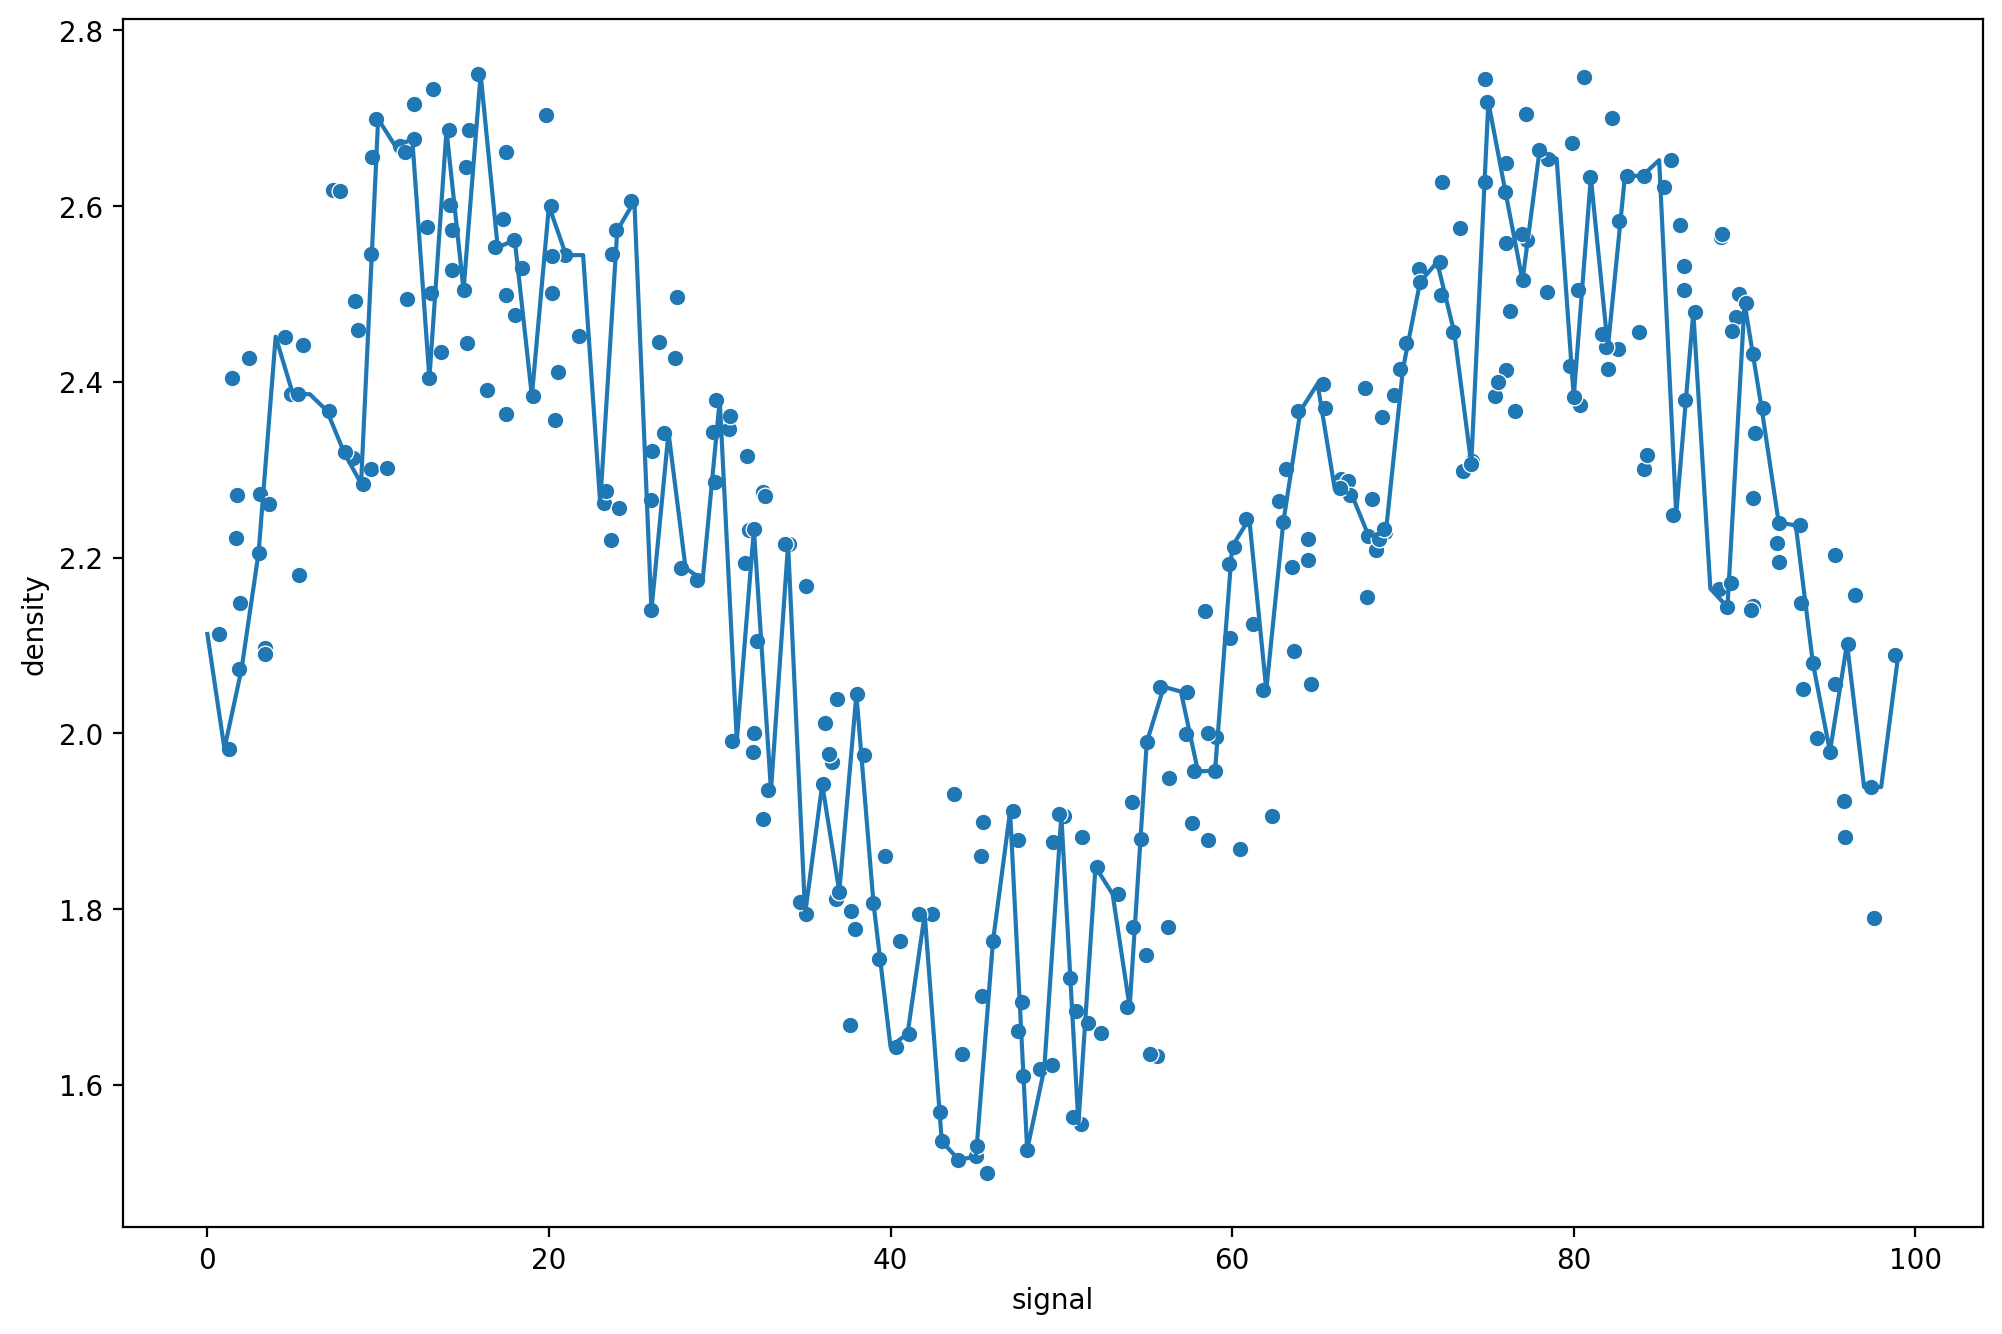

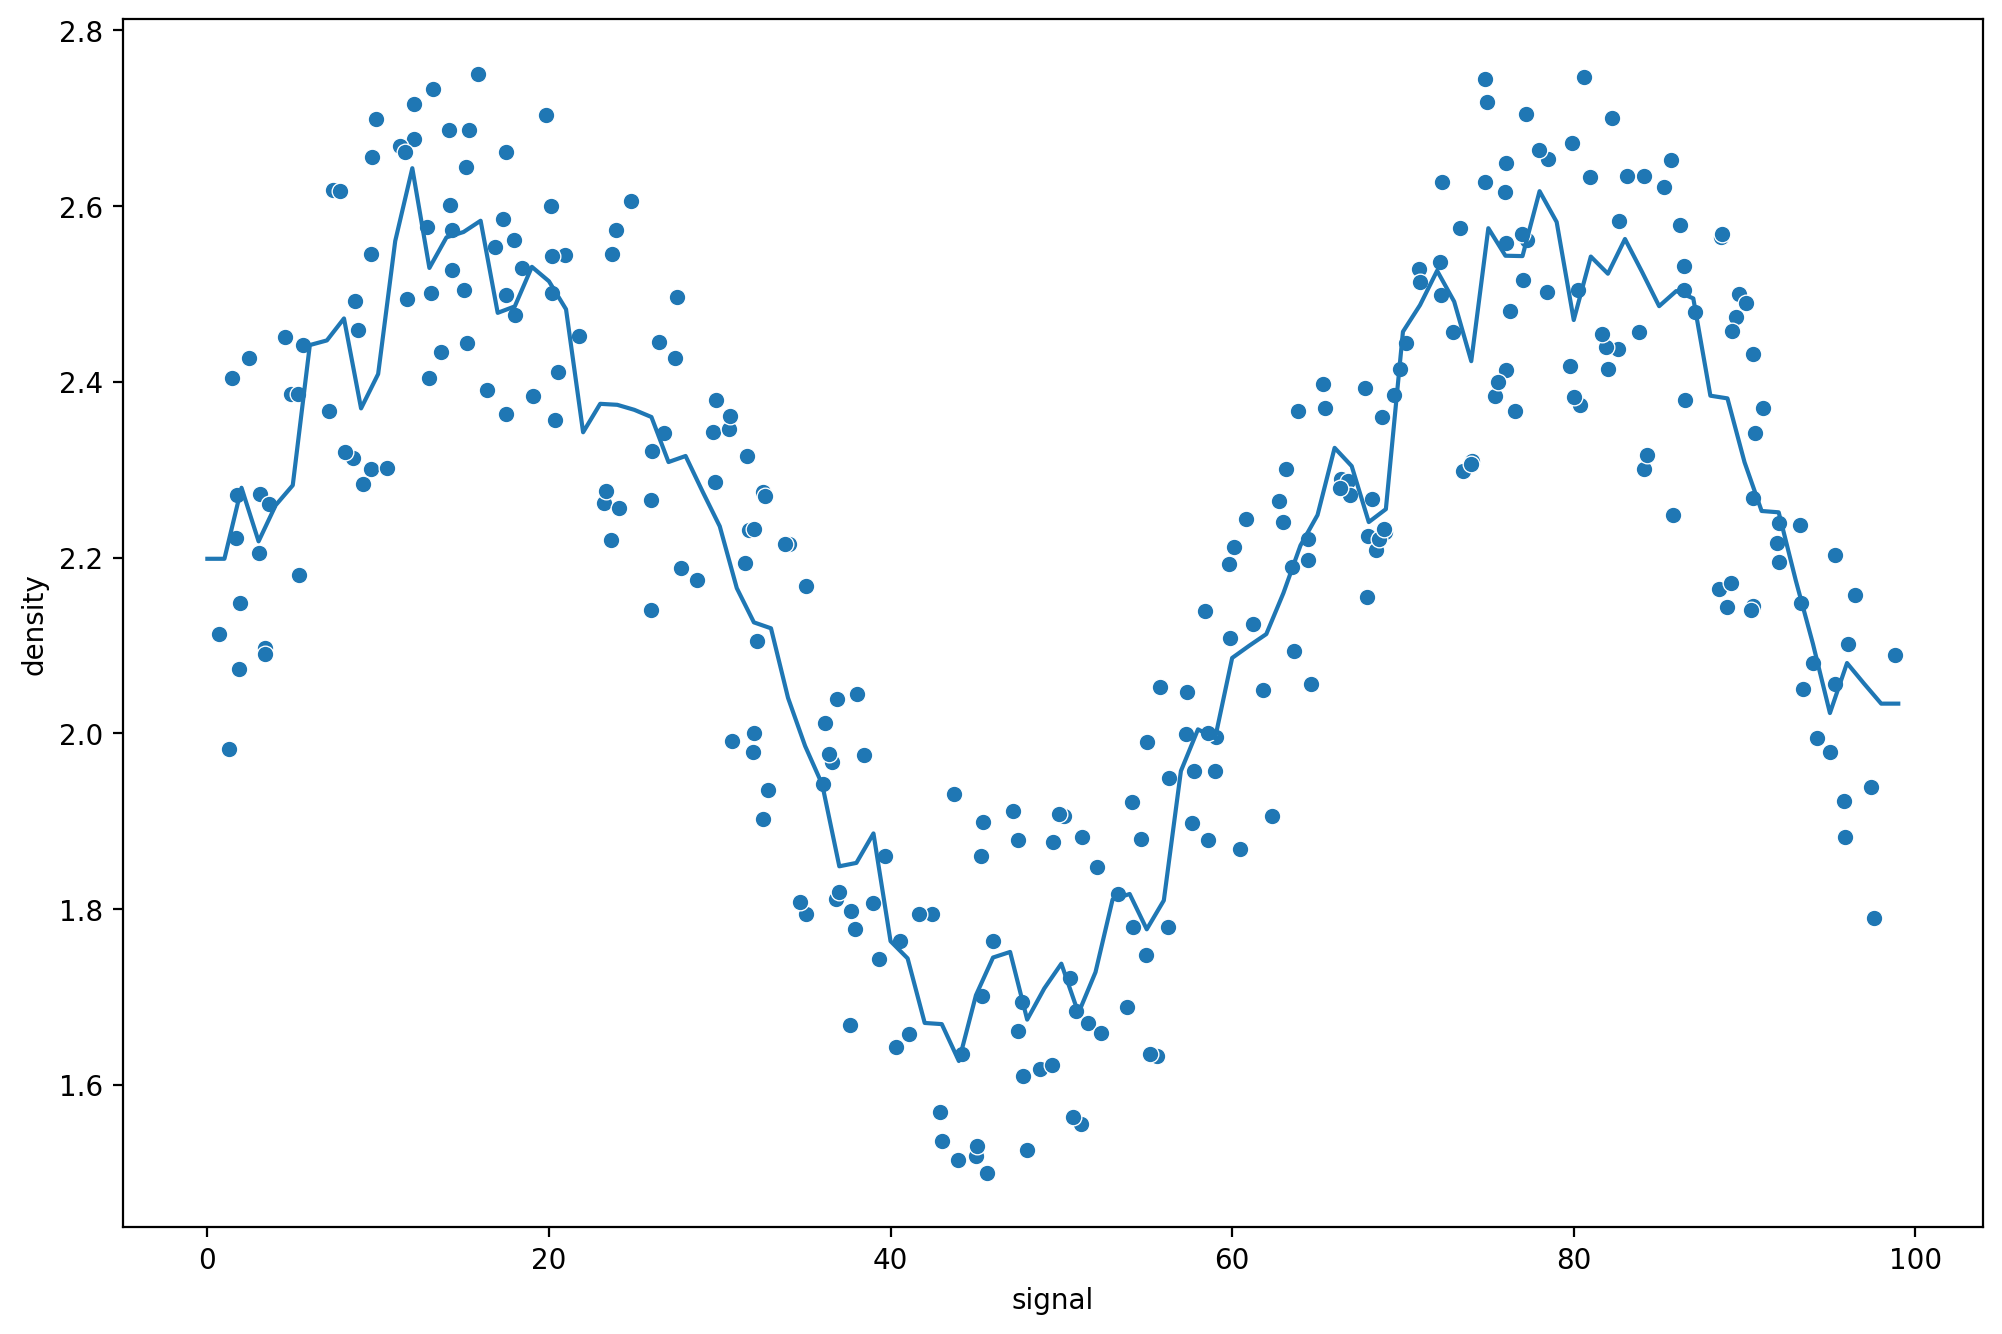

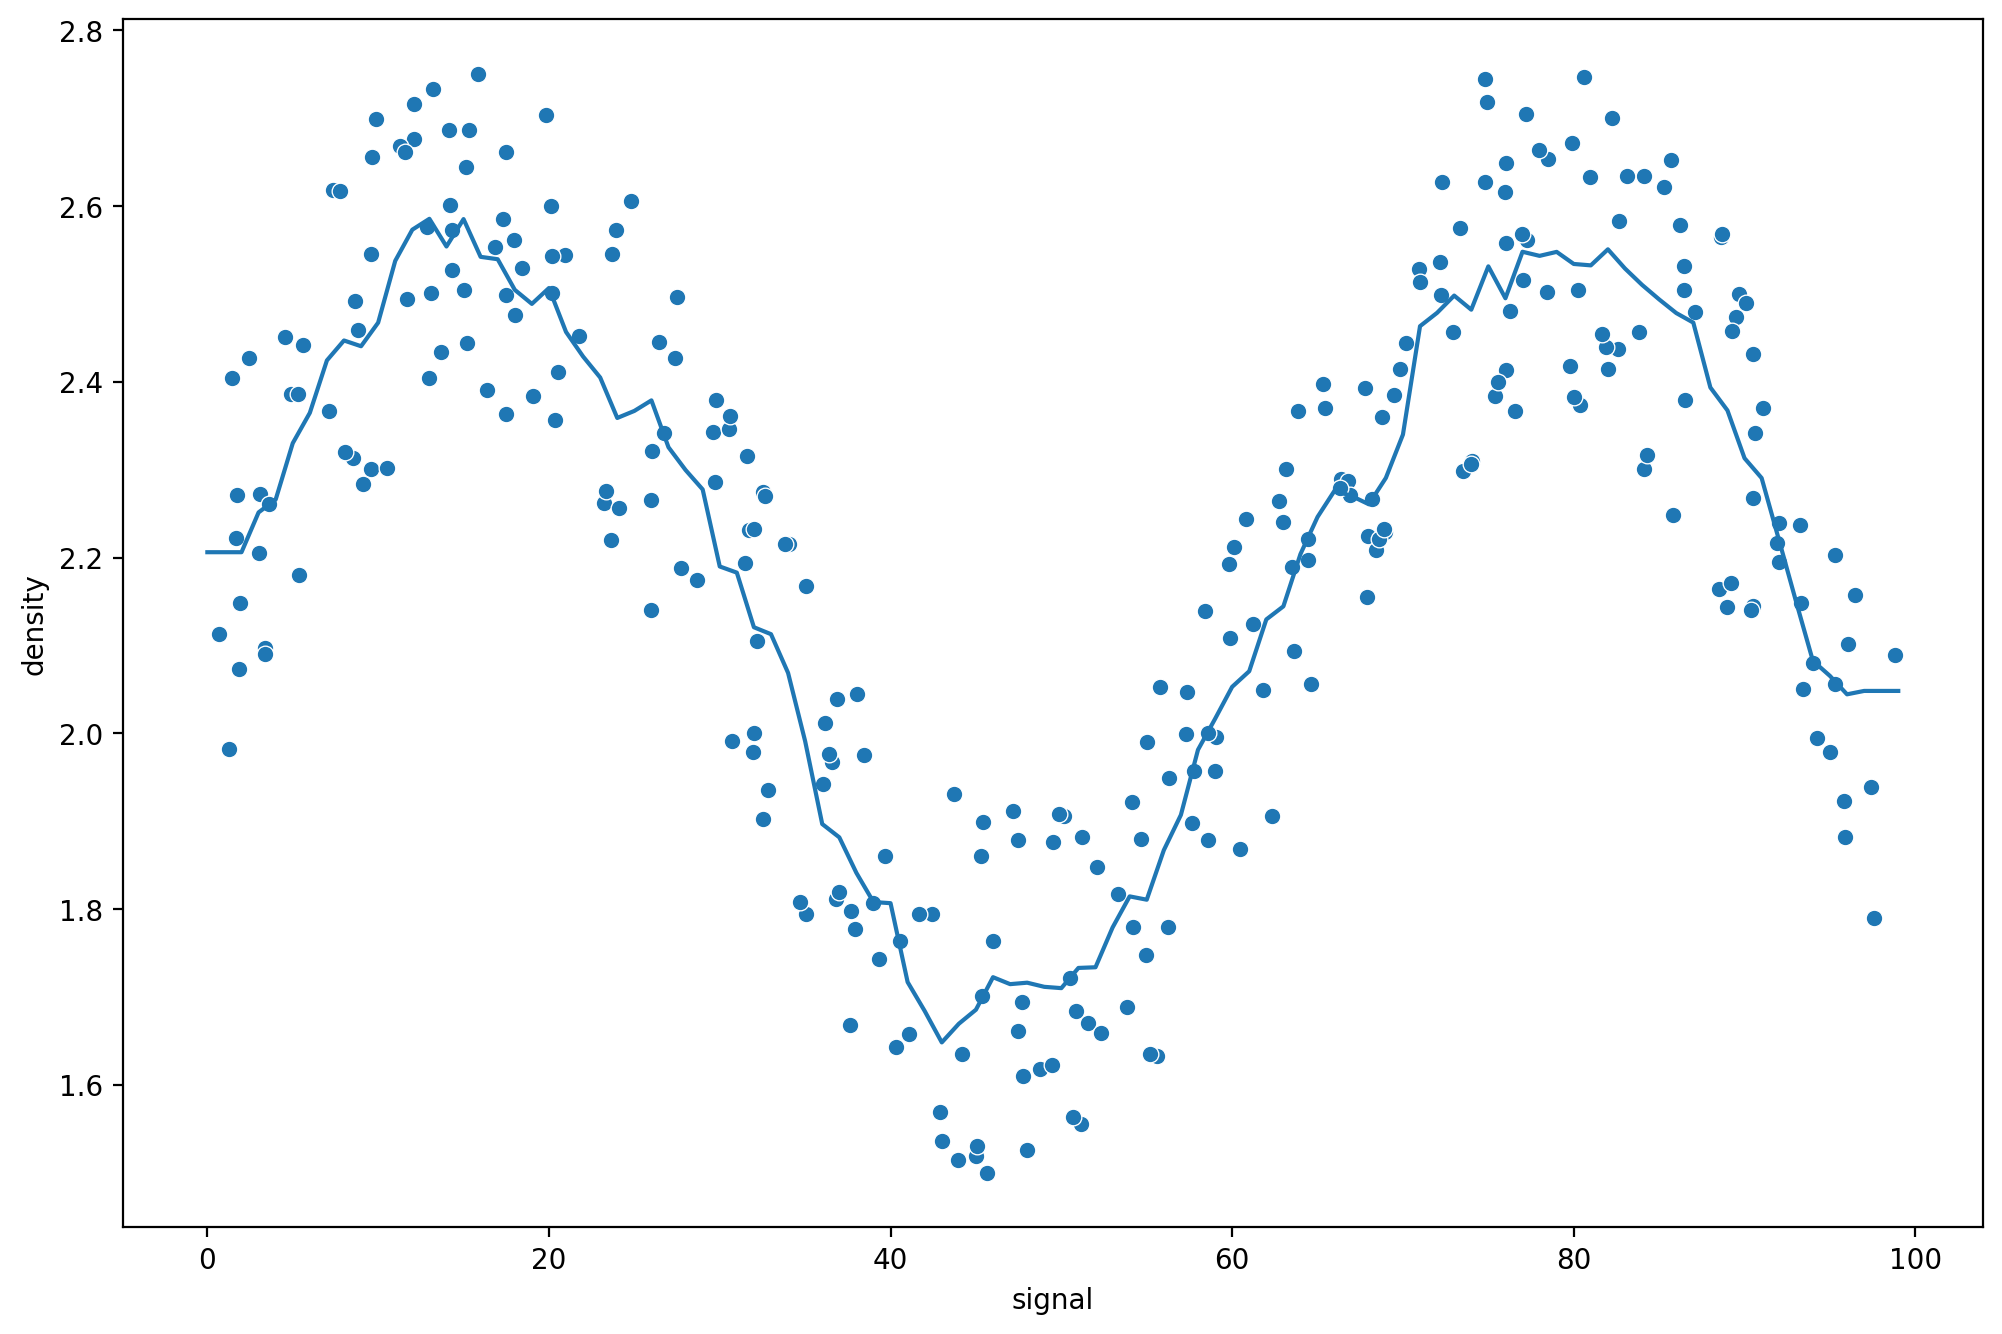

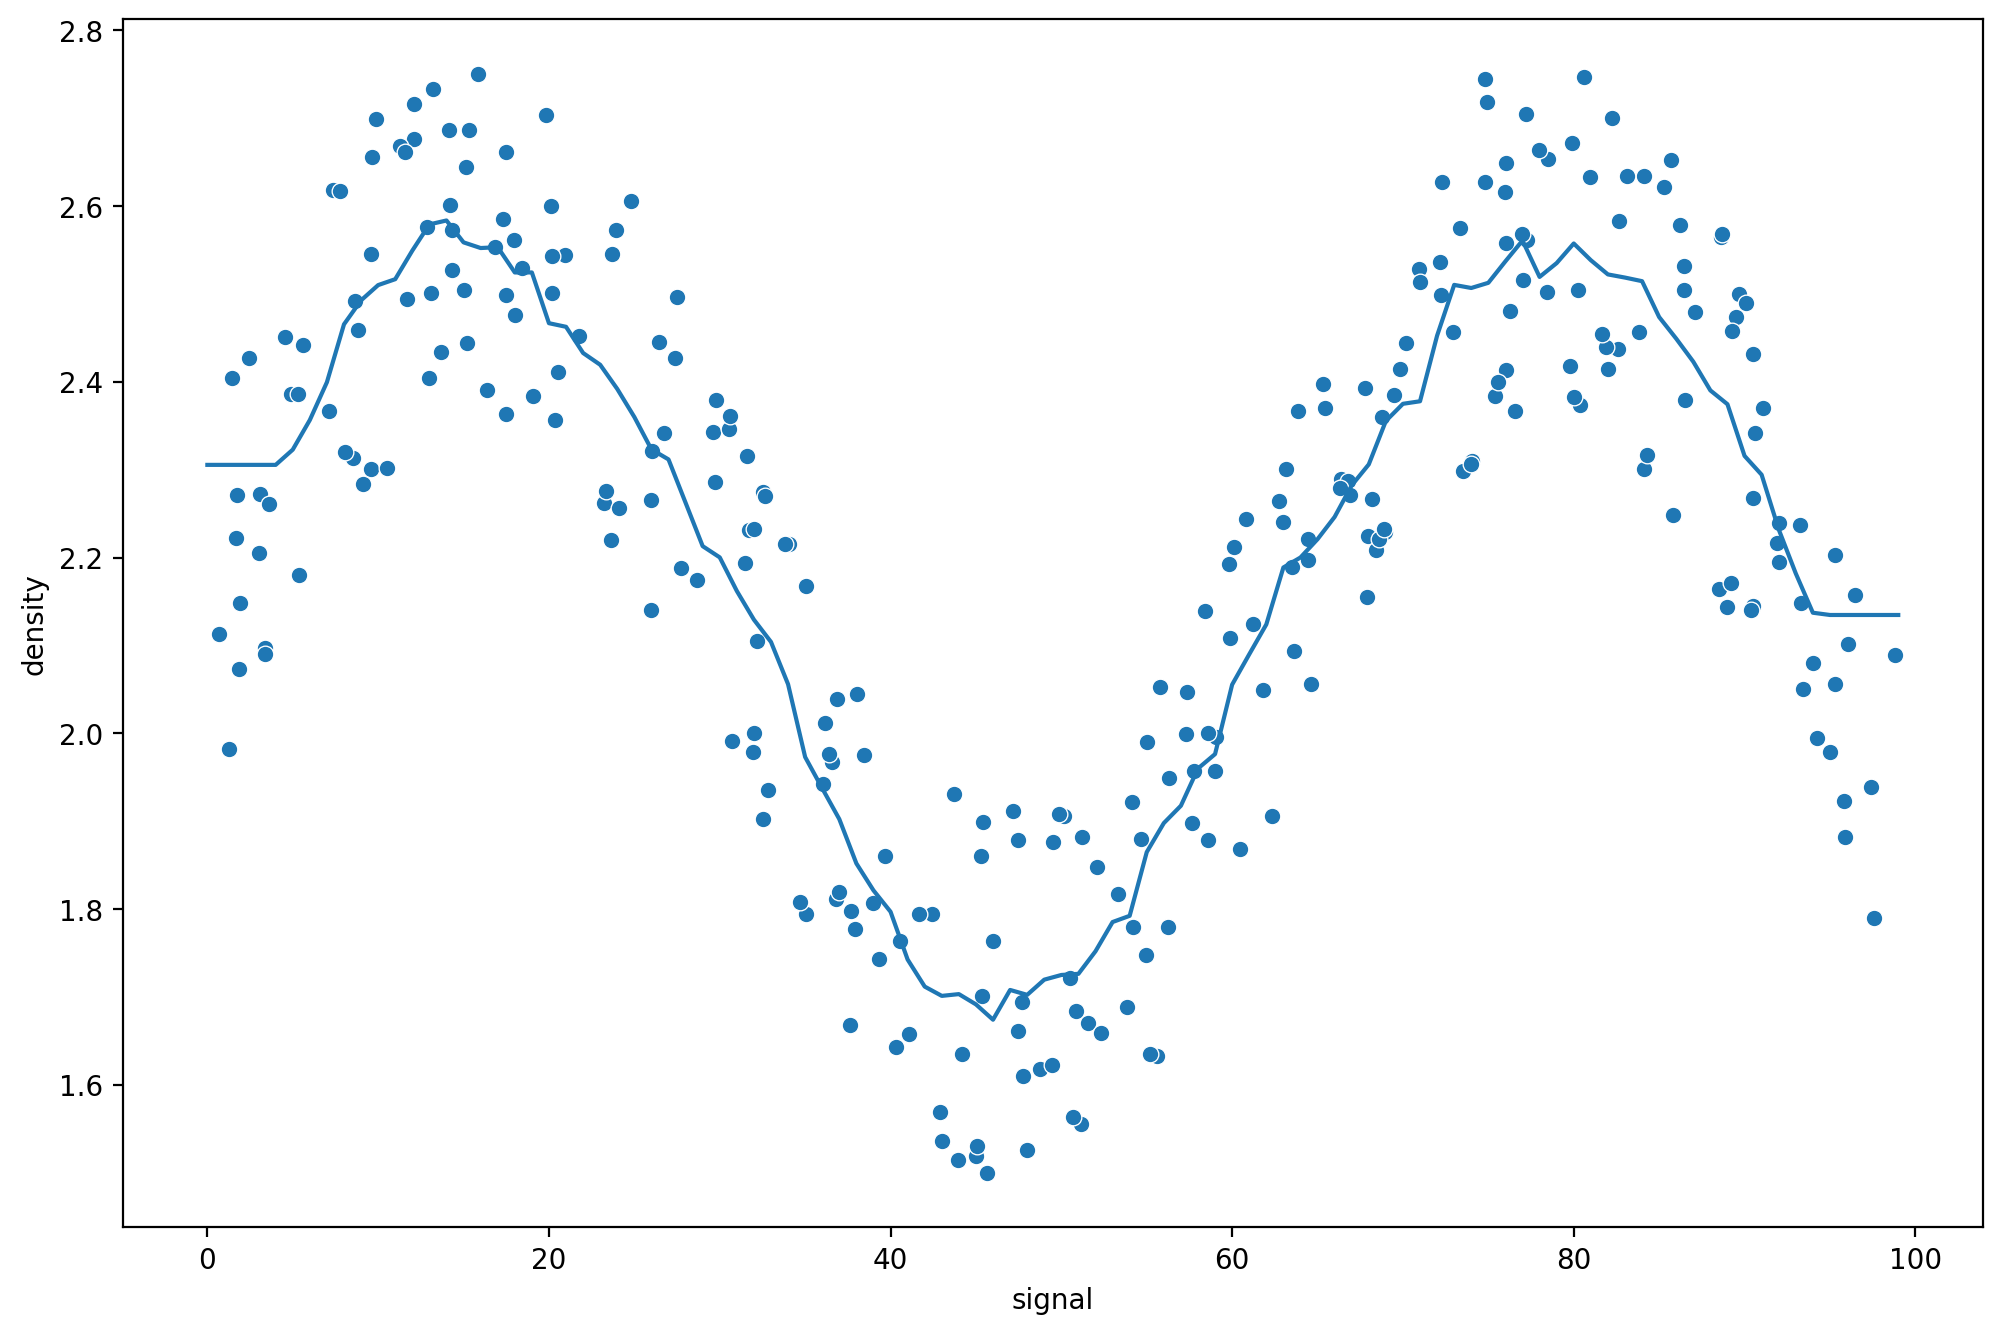

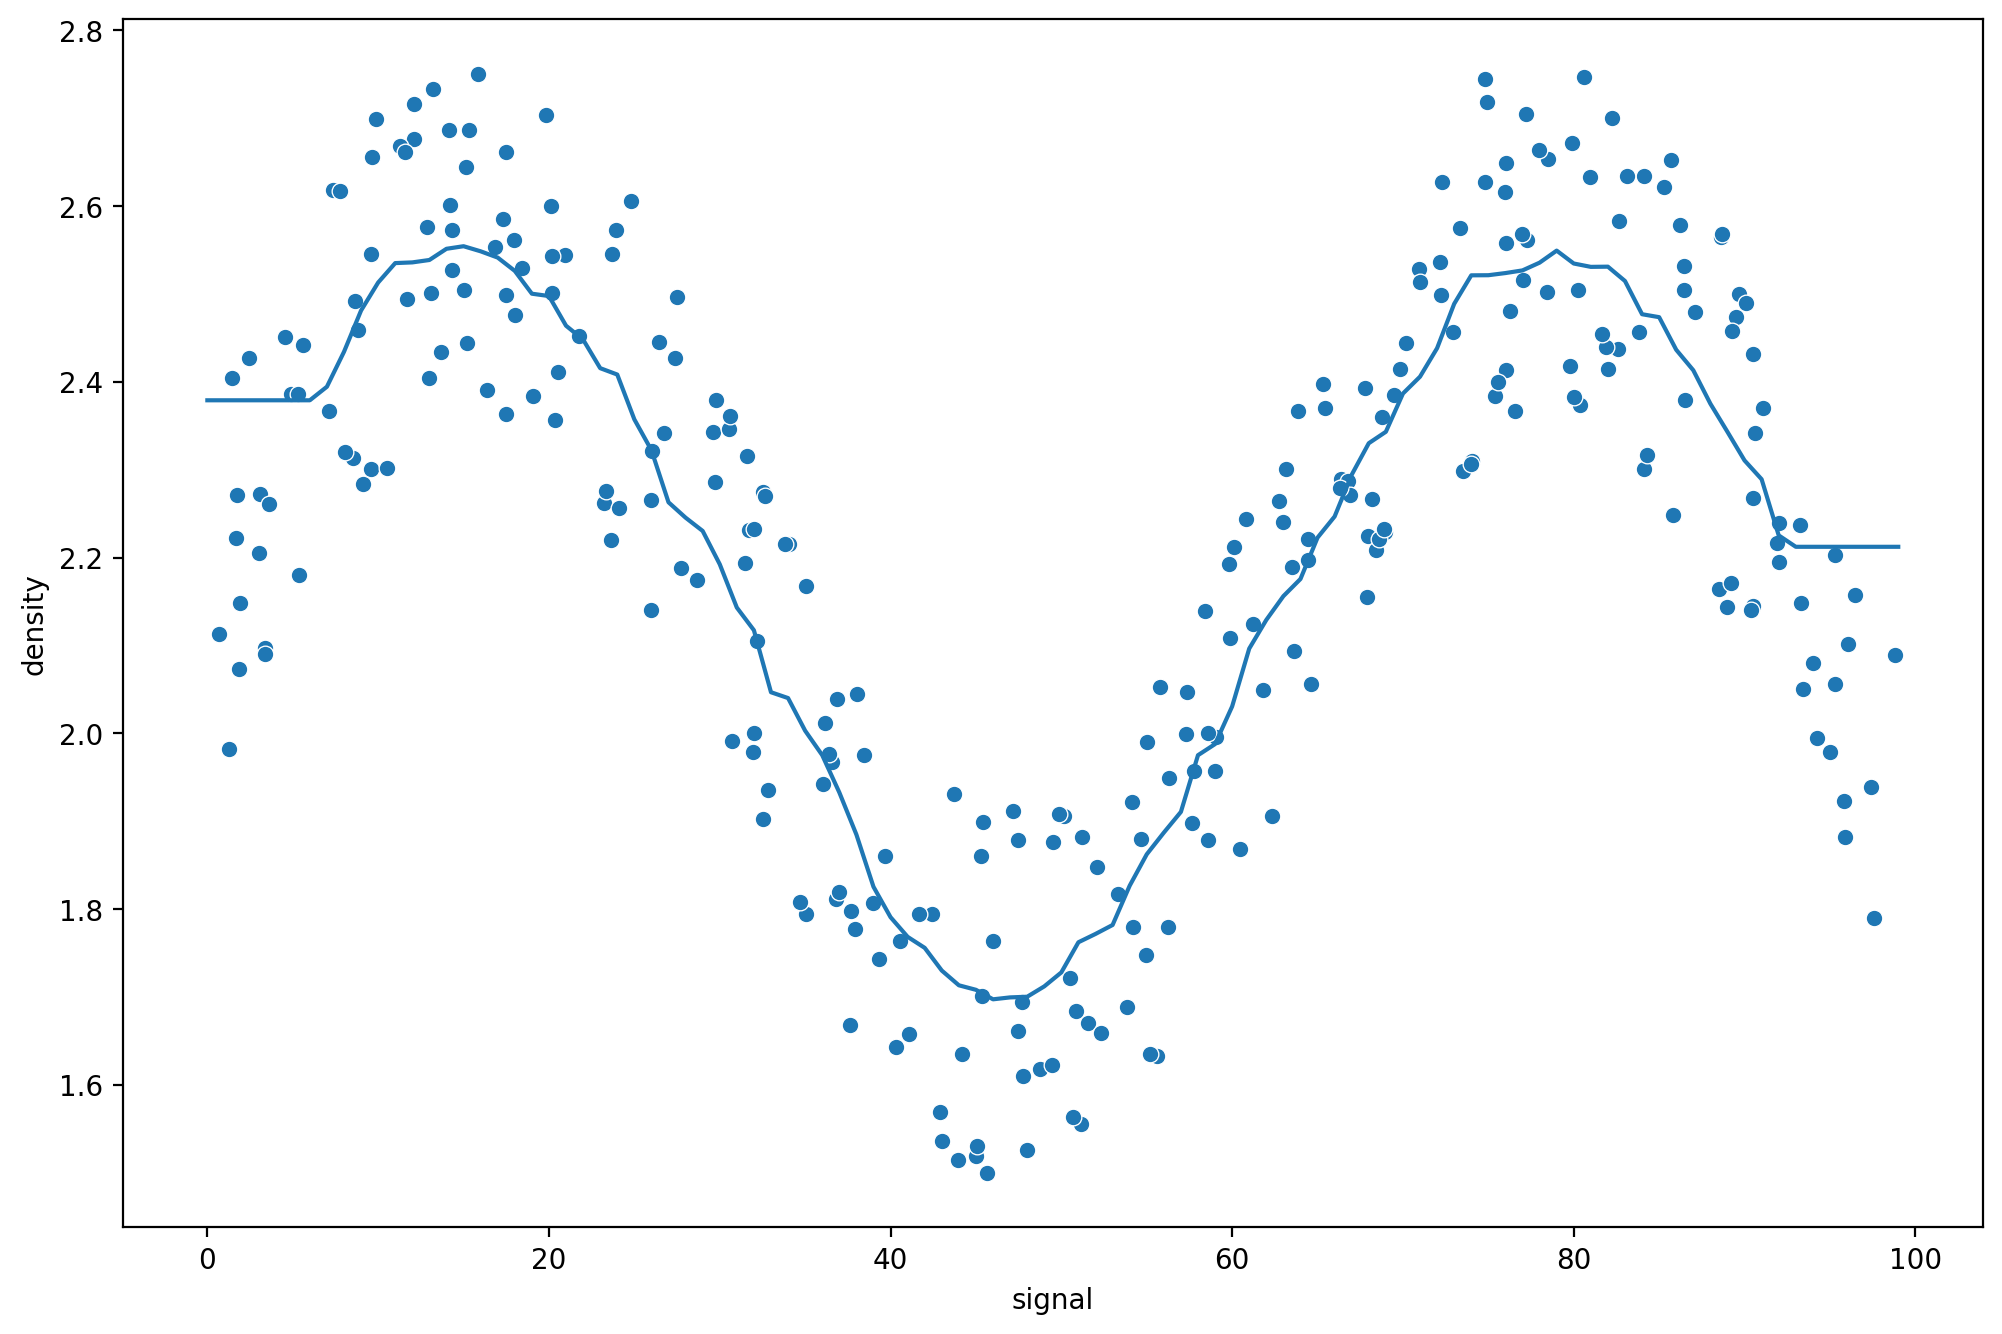

In [48]:
k_values=[1,5,10,20,30]

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    run_model(model,X_train,y_train,X_test,y_test)

Decision Tree Regressor

In [49]:
from sklearn.tree import DecisionTreeRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


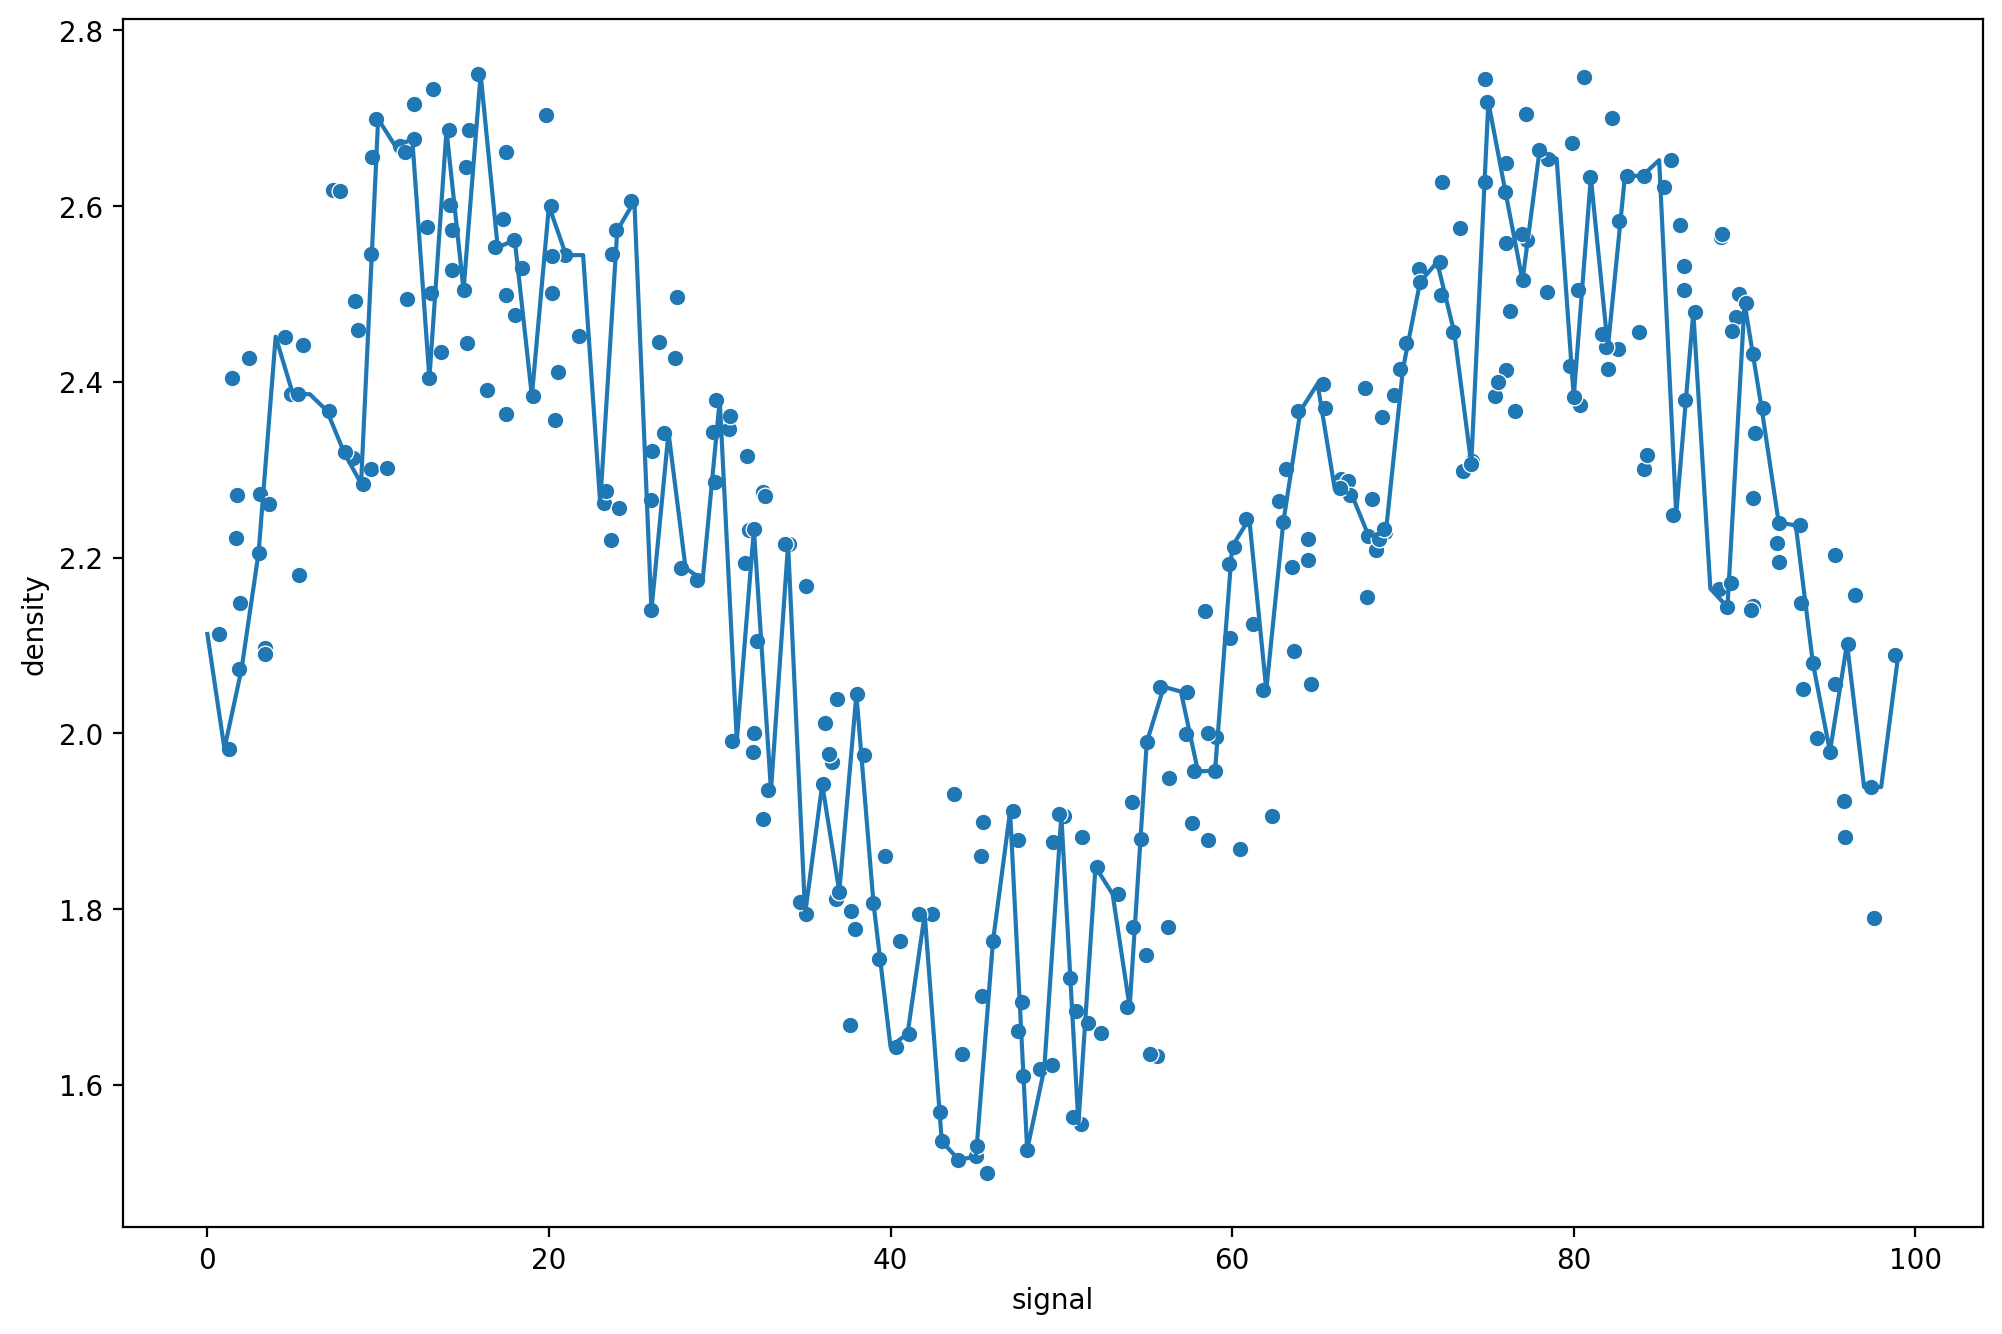

In [62]:
model=DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)


SVM regressor : tuning C and gamma is necessary

In [69]:
from sklearn.svm import SVR

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
svr = SVR()
param_grid = {'C':[0.01,0.1,1,10,100,1000],'gamma':['auto','scale']}
grid = GridSearchCV(svr,param_grid)

MAE: 0.10854210121348368
RMSE: 0.12646999302046696


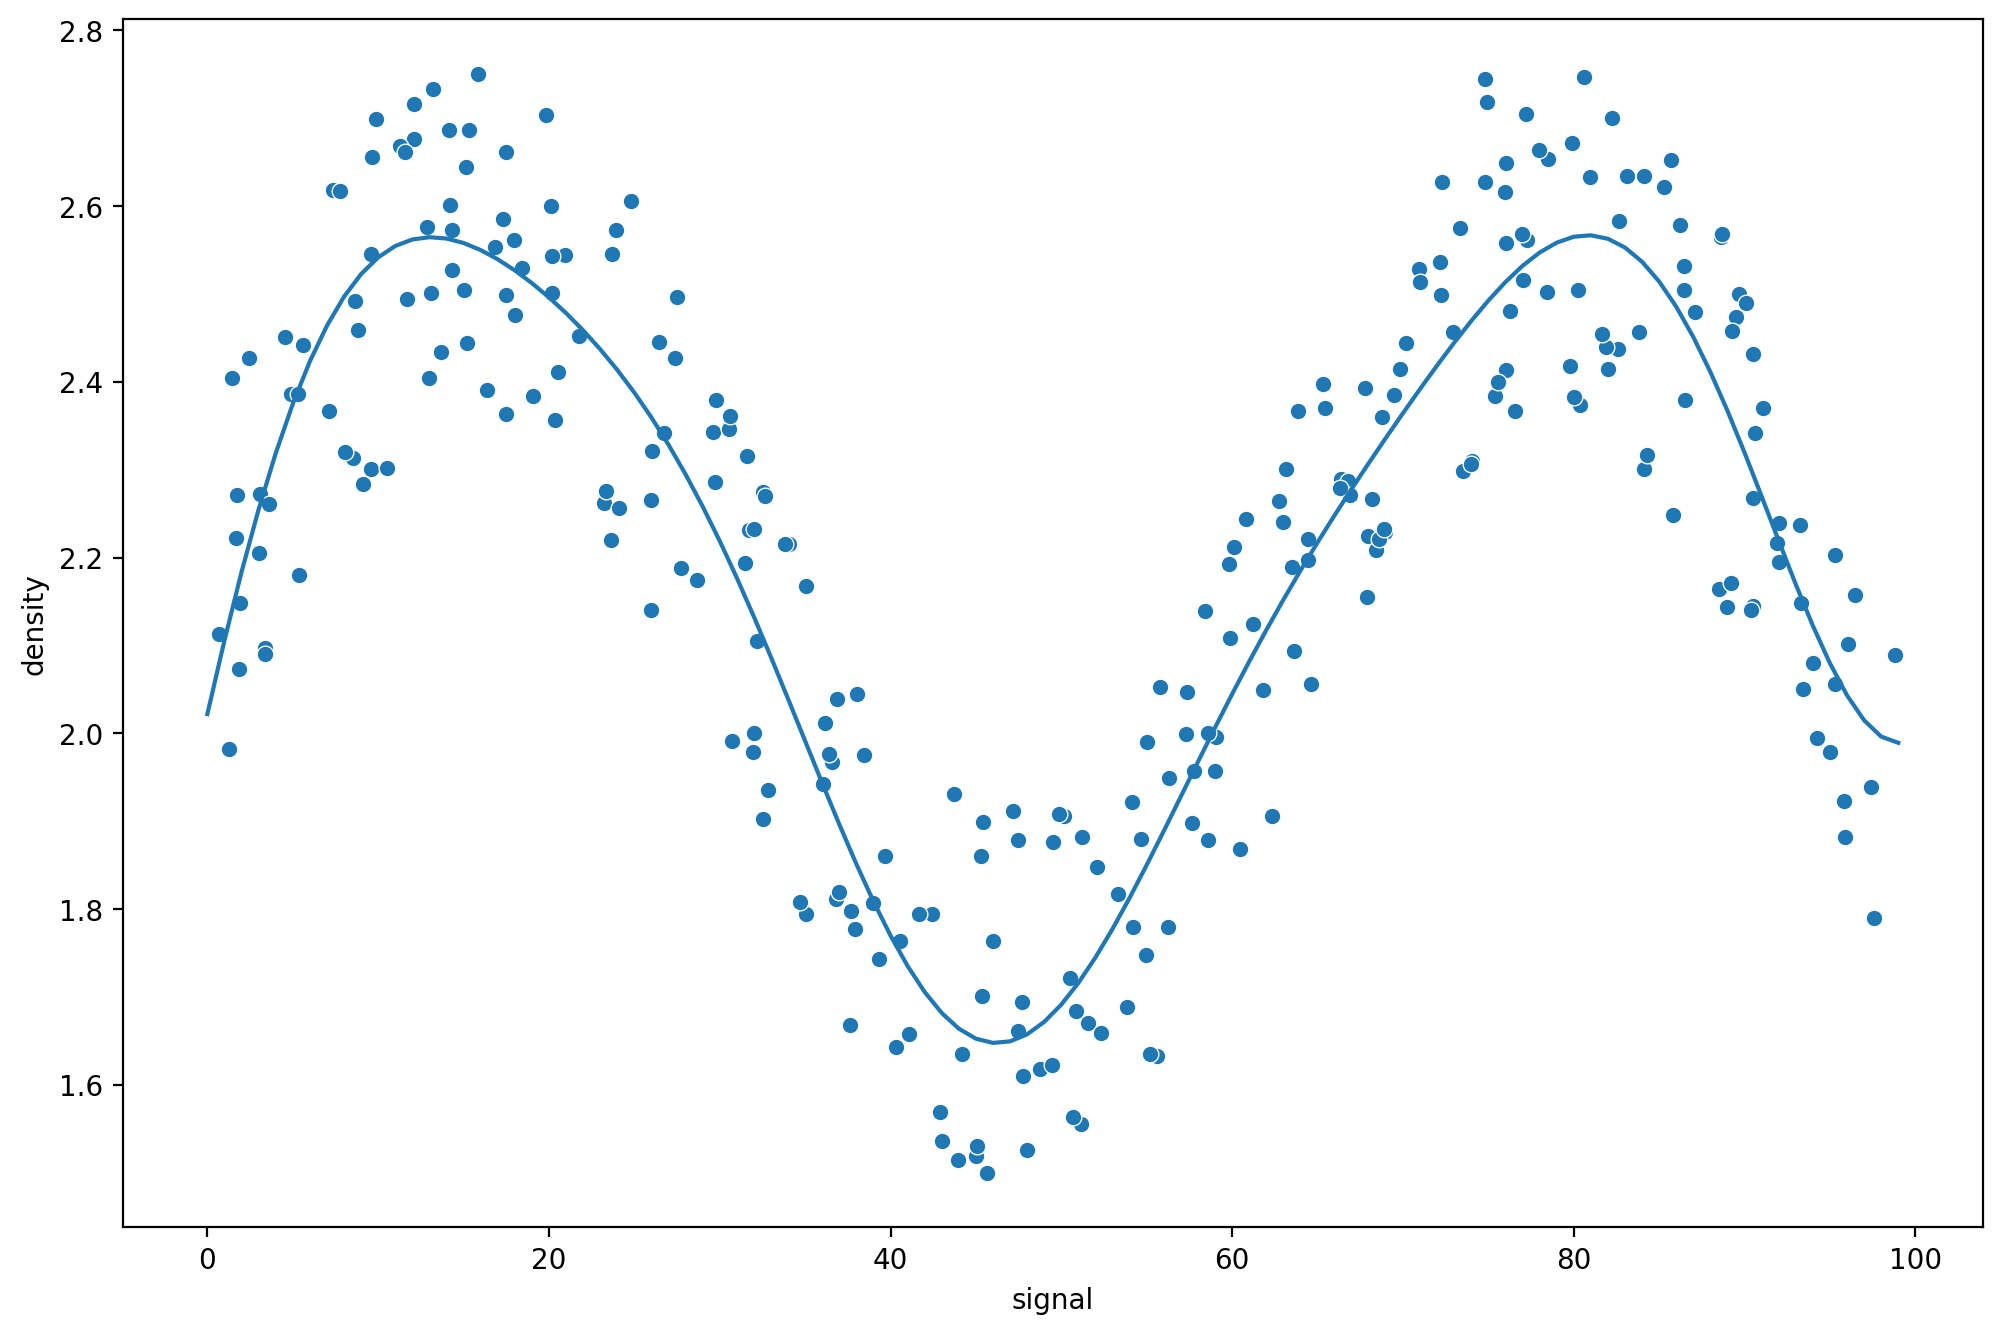

In [72]:
run_model(grid,X_train,y_train,X_test,y_test)

Random forest Regressor

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
rfr = RandomForestRegressor(n_estimators=10)

MAE: 0.10405785090379002
RMSE: 0.12870100150470126


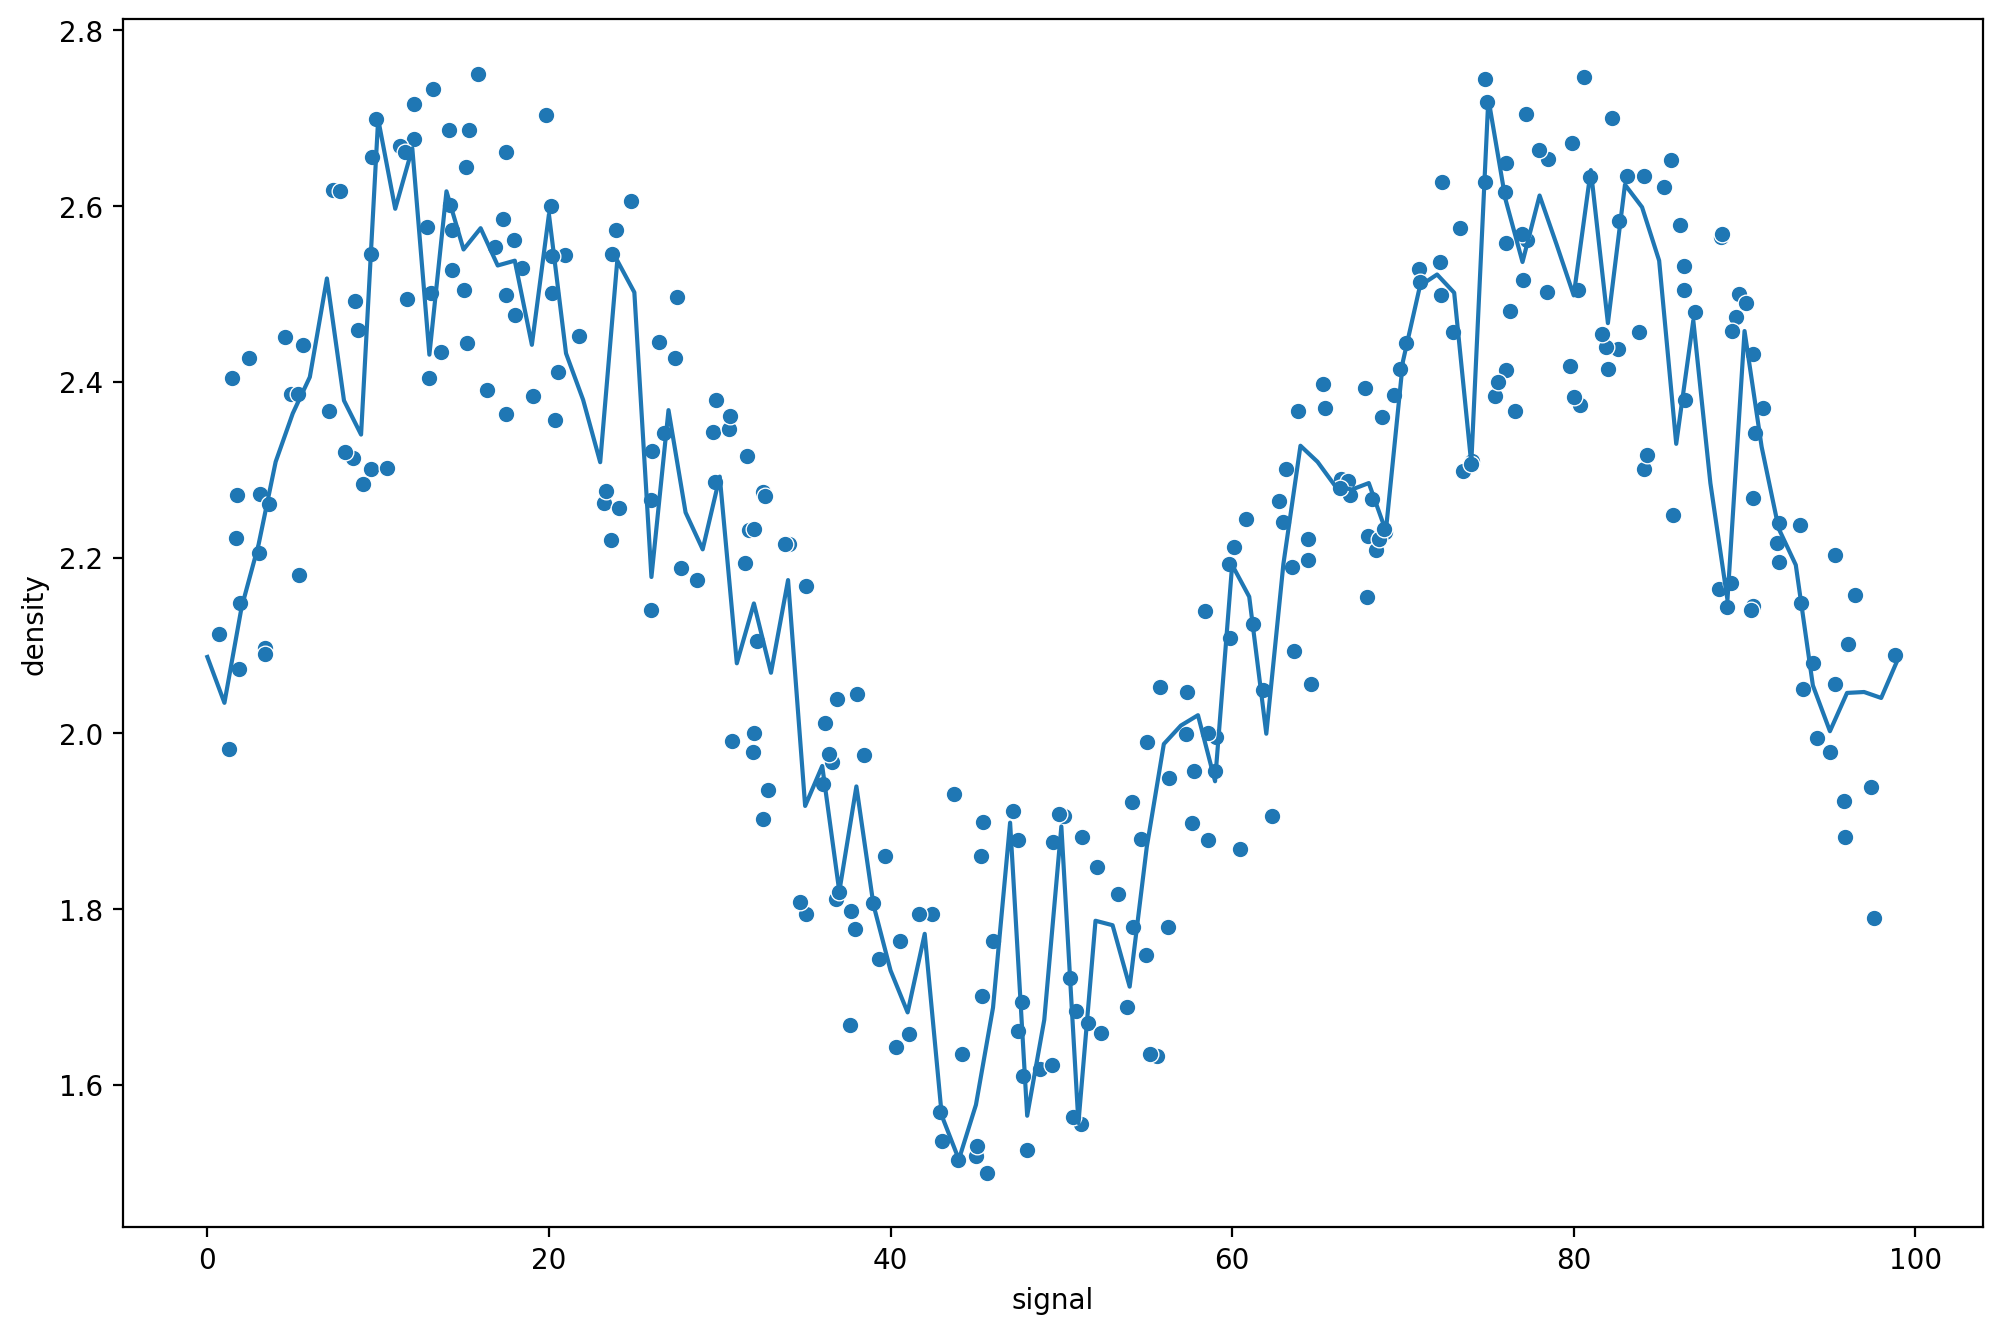

In [75]:
run_model(rfr,X_train,y_train,X_test,y_test)